In [64]:
%matplotlib inline
#Amitava Chakraborty - 06th Jan 2018
#Preliminaries
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit import BasicAer
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.visualization import plot_histogram, plot_state_qsphere

q_simulator = BasicAer.get_backend('qasm_simulator')
s_simulator = BasicAer.get_backend('statevector_simulator')
u_simulator = BasicAer.get_backend('unitary_simulator')

# Using Operator Class

In [2]:
from qiskit.quantum_info import Operator

# Define an init - 3 qubits, an Identity operator in each qubit - so 8x8 matrix
init = Operator.from_label('III')
# Define a X operator - 2x2 matrix
x = Operator.from_label('X')
# Define a H operator - 2x2 matrix
h = Operator.from_label('H')
print (init)
print(x)
print(h)

# Typical matrix multiplication, using @ operator of numpy - Operator XH
init @ x([0]) @ h([1])

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


Operator([[ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
            0.70710678+0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
           -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j,  0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.70710678+0.j,  0.        +0.j,
            0.70710678+0.j

In [3]:
from qiskit.quantum_info import ScalarOp, Operator

X = Operator.from_label('X')
Z = Operator.from_label('Z')

# Using qiskit.quantum_info.ScalarOp operator class (represents a scalar multiple of an identity operator) 
# We can initialize an identity on arbitrary dimension subsystems and 
#it will be implicitly converted to other BaseOperator subclasses 
#(such as an qiskit.quantum_info.Operator or qiskit.quantum_info.SuperOp) when it is composed with, or added to, them.

#Example: Identity operator
init = ScalarOp(2 ** 3)  # 3-qubit identity
op = init @ X([0]) @ Z([1]) @ X([2])  # Op XZX
print(op)

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [4]:
%qiskit_backend_overview

UsageError: Line magic function `%qiskit_backend_overview` not found.


In [129]:
n=5
qc = QuantumCircuit(n,n)
qc.h(range(int(n/2)))

qc.x(3)
qc.barrier()
qc.crx(np.pi,0,4)
qc.crx(np.pi/8,1,3)
qc.barrier()
#qc.h(range(n))
#qc.cz(1,2)
#qc.cy(2,3)
#qc.x(3)


[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  1.80820519e-17-9.75451610e-02j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  5.00000000e-01-3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  4.90392640e-01-3.60008073e-17j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -9.75451610e-02-3.60008073e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  6.12323400e-17-5.00000000e-01j
  0.00000000e+00+0.00000000e+00j  5.40828593e-17-4.90392640e-01j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

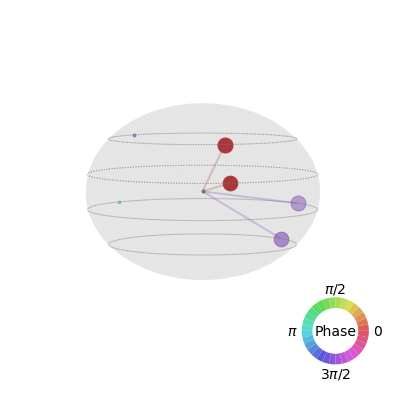

In [130]:
state = execute(qc, s_simulator).result().get_statevector()
print(state)
plot_state_qsphere(state)

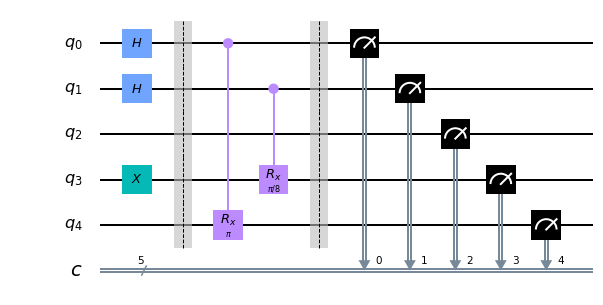

In [131]:
qc.measure(range(n),range(n))
qc.draw('mpl')

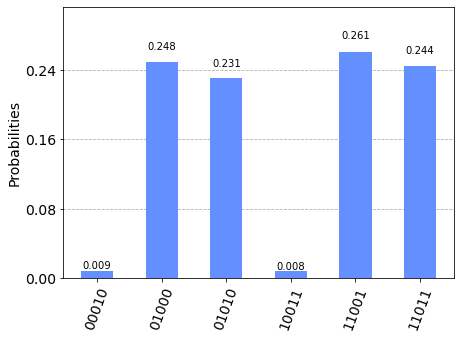

In [132]:
results = execute(qc, q_simulator, shots=2000).result()
plot_histogram(results.get_counts())